In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from astropy.io import fits
import glob

In [3]:
fnames = glob.glob('/data2/GBT/3C295/OnOff/scan*/*.fits')
fnames.sort()

In [4]:
k = 4

In [5]:
plots = True

In [6]:
def mad(x, axis=None):
    return np.nanmedian(np.abs(x - np.nanmedian(x, axis)), axis)

In [7]:
def moving_median(x, N):
    idx = np.arange(N) + np.arange(len(x) - N + 1)[:, None]
    return np.nanmedian(x[idx], axis=1)

/data2/GBT/3C295/OnOff/scan40.raw.vegas/scan40.raw.vegas.A.fits


/usr/lib/python2.7/site-packages/ipykernel/__main__.py:43: RuntimeWarning: invalid value encountered in greater


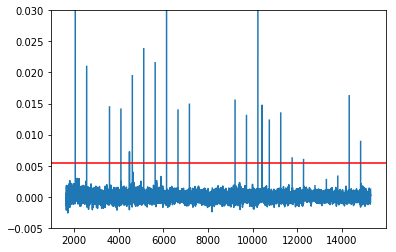

In [8]:
test1 = fits.open(fnames[k])
print fnames[k]
hdu = test1[1]
data = hdu.data['DATA']
result = {}
result['source'] = hdu.data['PROCSCAN'][0]

N = 2**14
df = hdu.data['CDELT1'][0]
center_freq = hdu.data['CRVAL1'][0]
centerbin = hdu.data['CRPIX1'][0]
index = np.arange(N)
if_freqs = freqstest = index * (-df) # in Hz
freqs = (center_freq + df * (index + 1 - centerbin))[::-1]
result['if_freqs'] = if_freqs
result['centerfreq'] = center_freq
result['freqs'] = freqs

result['xxoff'] = data[::8,::-1]
result['xxon'] = data[1::8,::-1]
result['yyoff'] = data[2::8,::-1]
result['yyon'] = data[3::8,::-1]
result['xyoff'] = data[4::8,::-1]
result['xyon'] = data[5::8,::-1]
result['yxoff'] = data[6::8,::-1]
result['yxon'] = data[7::8,::-1]

noiser = result['xxon'] - result['xxoff']
mask = np.ones(N, dtype=bool)
mask[(index % 512) == 0] = False
normed_data = (np.nanmedian(result['xxoff'], 0) / np.nanmedian(noiser, 0))
normed_data[~mask] = np.nan
mvmedspec = moving_median(normed_data, 5)
flatdata = (normed_data[:-4] - mvmedspec)
madspec = mad(flatdata)
mask[if_freqs < 150.e6] = False
mask[if_freqs > 1400.e6] = False
flatdata[~mask[:-4]] = np.nan
if plots:
    plot(flatdata)
    axhline(18 * madspec, color='r')
    ylim(-0.005, 0.03)
mask[:-4][flatdata > (18 * madspec)] = False

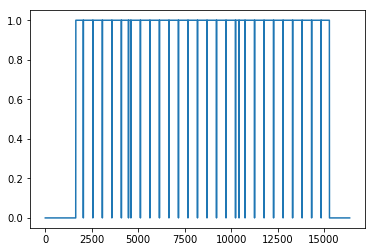

In [9]:
plot(mask)

In [10]:
xx = result['xxoff']

In [11]:
xx.shape

(1431, 16384)

In [12]:
mask.shape

(16384,)

In [13]:
newxx = xx[mask[None,:]]

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1431 but corresponding boolean dimension is 1
  if __name__ == '__main__':


In [14]:
mask[None,:].shape

(1, 16384)

In [51]:
result['xxoff'] = result['xxoff'][mask]

/usr/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 1431 but corresponding boolean dimension is 16384
  if __name__ == '__main__':


IndexError: index 1639 is out of bounds for axis 0 with size 1431